![logo](../../picture/license_header_logo.png)
> **Copyright &copy; 2020 - 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program and the accompanying materials are made available under the
terms of the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). <br>
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations
under the License. <br>
<br>**SPDX-License-Identifier: Apache-2.0**

## Simple Forecasting Method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from datetime import datetime

%matplotlib inline

In [2]:
start = datetime(2010, 1, 1)
end = datetime(2015, 12, 31)

df = web.get_data_yahoo('TSLA', start=start, end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,46.375999,45.655998,46.112000,46.113998,3540000,46.113998
2015-12-28,46.396000,45.108002,46.298000,45.790001,9506500,45.790001
2015-12-29,47.543999,45.910000,46.012001,47.438000,12031500,47.438000
2015-12-30,48.726002,47.133999,47.320000,47.618000,18489500,47.618000
2015-12-31,48.689999,47.674000,47.702000,48.001999,13575000,48.001999


In [4]:
#remove high, low, open, close and volume and rename Adj Close to close

df.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1, inplace=True)
df = df.rename(columns={'Adj Close':'close'})

In [5]:
#train test split
N_DAYS_TEST = 150

df_train = df[:-N_DAYS_TEST]
df_test = df[-N_DAYS_TEST:]

### Average method

In [6]:
y_pred = df_train['close'].mean()

In [7]:
#extrapolate y_pred to N number of days into futures
y_preds = [y_pred]*N_DAYS_TEST
y_preds = pd.Series(y_preds, index=df_test.index)

In [8]:
avg = pd.concat([df_train['close'], y_preds])

In [9]:
df['average'] = avg

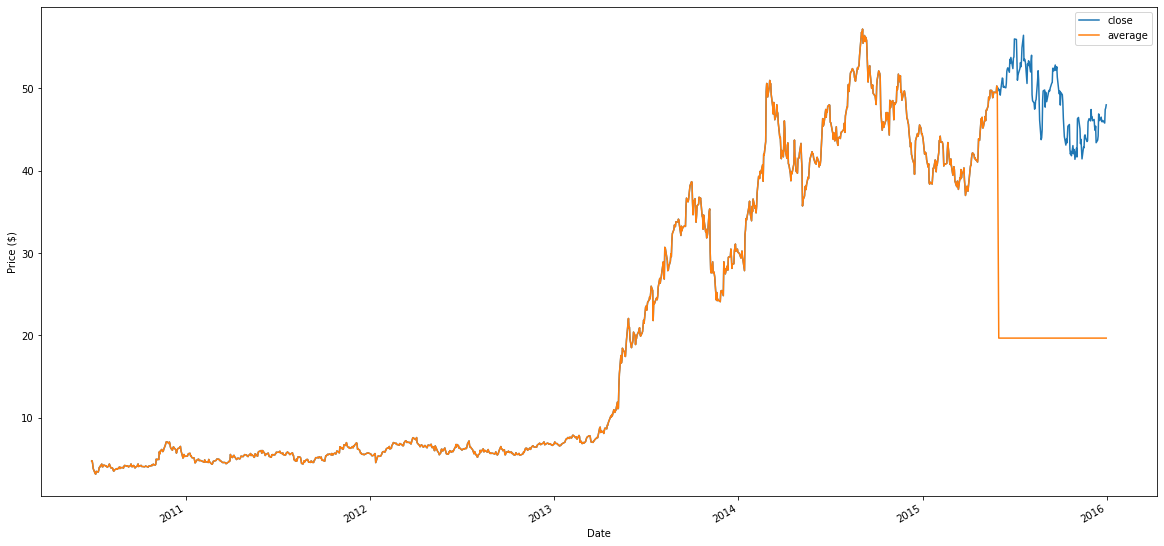

In [10]:
df.plot(figsize=(20,10))
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()

### Naive Method

In naive method, we will be using the `.shift()` method to shift the `close` price by 1 time step.

In [11]:
df['lag_1'] = df['close'].shift(1)

The `lag_1` now contains the lagged closing price of the stock. The initial value of the `lag_1` is `NaN` since we do not have any previous close price before `2010-06-29`.

In [12]:
df[['close', 'lag_1']]

,close,lag_1
Date,,
2010-06-29,4.778000,NaN
2010-06-30,4.766000,4.778000
2010-07-01,4.392000,4.766000
2010-07-02,3.840000,4.392000
2010-07-06,3.222000,3.840000
...,...,...
2015-12-24,46.113998,45.939999
2015-12-28,45.790001,46.113998
2015-12-29,47.438000,45.790001


According to naive method, we use the price of yesterday to predict today's price. For example, if the price of the stock on 2010-06-29 is 4.778000, we will use this value as the predicted price for `2010-06-30`. <br>
To avoid any confusion, let us rename `lag_1` to `naive`.

In [13]:
df = df.rename(columns={'lag_1':'naive'})

Let us look at the performance of naive method and the average method on the test set and compare them together.

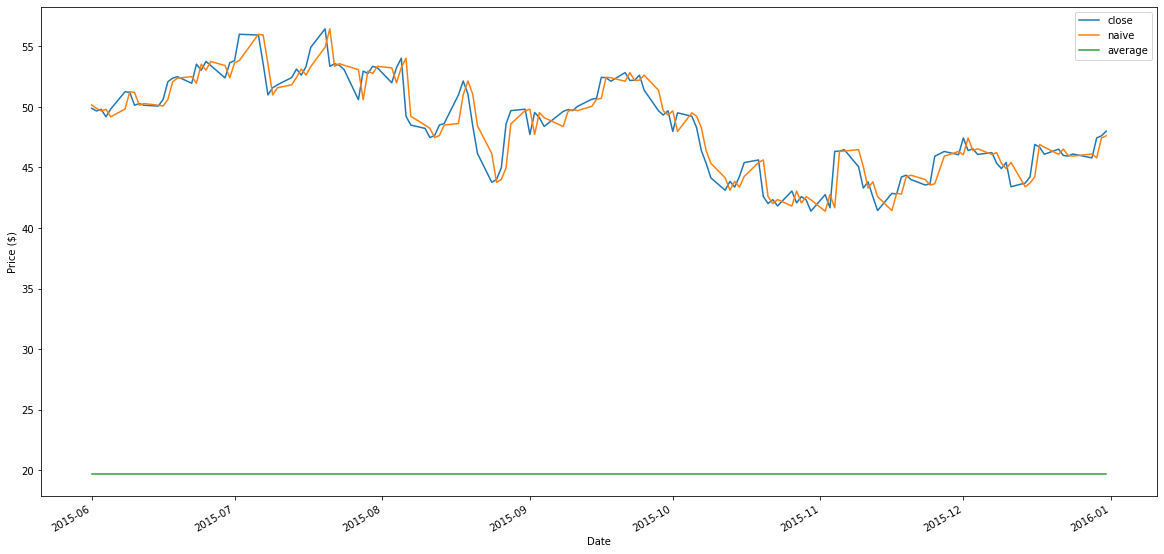

In [14]:
df[['close', 'naive', 'average']].iloc[-N_DAYS_TEST:].plot(figsize=(20,10))
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()